Car price prediction

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('car_data.csv')

In [ ]:
df.head(5)

Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic  
3  1500  Imported    99900       Islamabad    Automatic  
4  1300     Local    55000       Islamabad       Manual

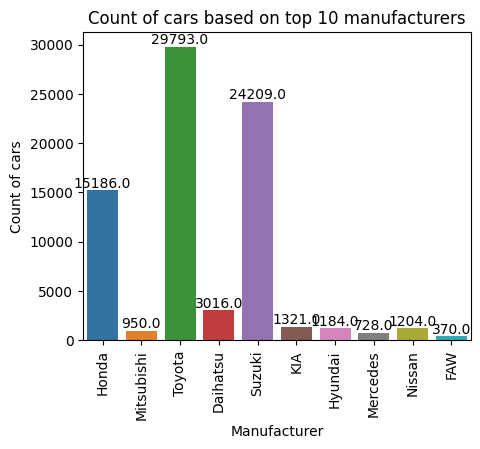

In [ ]:
top_manufacturers = df['Make'].value_counts().nlargest(10).index
df_top10 = df[df['Make'].isin(top_manufacturers)]

plt.figure(figsize=(5, 4))
plot = sns.countplot(x='Make', data=df_top10)
plt.xticks(rotation=90)

for p in plot.patches:
    plot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2.0,
                   p.get_height()),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title("Count of cars based on top 10 manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

plt.show()

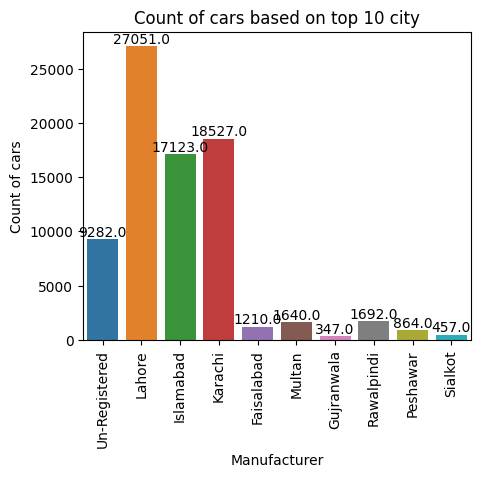

In [ ]:
top_manufacturers = df['Registered City'].value_counts().nlargest(10).index
df_top10 = df[df['Registered City'].isin(top_manufacturers)]

plt.figure(figsize=(5, 4))
plot = sns.countplot(x='Registered City', data=df_top10)
plt.xticks(rotation=90)

for p in plot.patches:
    plot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2.0,
                   p.get_height()),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title("Count of cars based on top 10 city")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

plt.show()

In [ ]:
new_df = df.copy()

In [ ]:
def plot_distribution(dataframe, column_name):
    # Distribution of a column in a DataFrame.
    # column exist
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return
    # Set up the figure and axes
    plt.figure(figsize=(4, 2))

    # histogram
    sns.histplot(data=dataframe, x=column_name, kde=True, bins=30, color='skyblue')

    # Labels
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

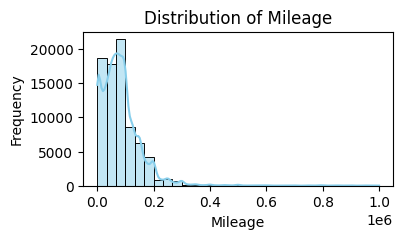

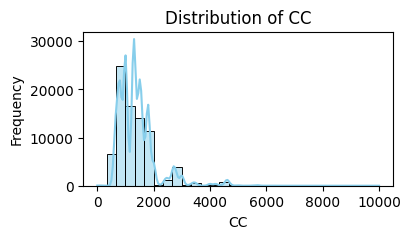

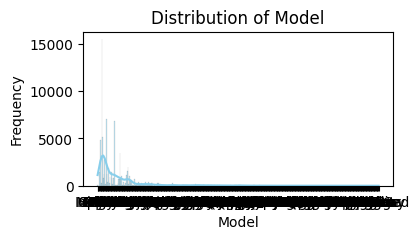

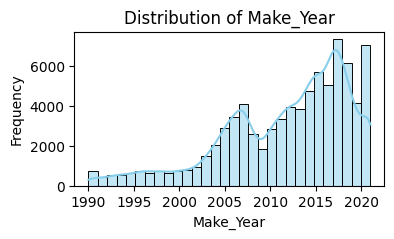

In [ ]:
plot_distribution(new_df, 'Mileage')
plot_distribution(new_df, 'CC')
plot_distribution(new_df, 'Model')
plot_distribution(new_df, 'Make_Year')

In [ ]:
# new_df = new_df[:1000]

In [ ]:
missing_values_sum = new_df.isnull().sum()
print("Sum of Missing Values:")
print(missing_values_sum)

Sum of Missing Values:
Make                  0
Model                 0
Version            6772
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64


Drop rows with price "Call for price"

In [ ]:
call_for_prices = new_df[new_df["Price"]=="Call for price"]
call_for_price_count = len(call_for_prices)
print(call_for_price_count)
new_df = new_df[df['Price'] != 'Call for price']
print(new_df.shape,df.shape)

1209
(79363, 10) (80572, 10)


Unique Number Values in every col

In [ ]:
for col in new_df.columns:
  print(col, " -- ", len(new_df[col].unique()))

Make  --  66
Model  --  385
Version  --  1329
Price  --  2228
Make_Year  --  32
CC  --  112
Assembly  --  2
Mileage  --  8772
Registered City  --  187
Transmission  --  2


In [ ]:
# new_df.info()

In [ ]:
new_df['Price'] = new_df['Price'].astype(float).astype(int)

Categorical Values to Numeircal Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df['Make'] = label_encoder.fit_transform(new_df['Make'])
new_df['Model'] = label_encoder.fit_transform(new_df['Model'])
new_df['Registered City'] = label_encoder.fit_transform(new_df['Registered City'])

In [ ]:
# If version >= 1.5 -> High power = 1 else 0
import re
def check_version(version):
    if isinstance(version, str):
        numbers = re.findall(r'\d+\.\d+', version)
        if numbers:
            first_number = float(numbers[0])
            return 1 if first_number >= 1.5 else 0
        else:
            return 0
    else:
        return 0

In [ ]:
new_df['high_power'] = new_df['Version'].apply(check_version)
new_df = new_df.drop('Version', axis=1)

One hot encoding

In [ ]:
new_df = pd.get_dummies(columns=['Assembly', 'Transmission'], data=new_df)
new_df

Make  Model    Price  Make_Year    CC  Mileage  Registered City  \
0        25    168  7400000       2019  1500     2000              180   
1        43    212  1065000       2019   660    68000               97   
2         1     17  9300000       2015  1800    70000               97   
3        61     31  2375000       2014  1500    99900               66   
4        25     84  2600000       2017  1300    55000               66   
...     ...    ...      ...        ...   ...      ...              ...   
80567    59     53   750000       2015   800    98000               97   
80568    59     30  1480000       2020   660     7800               80   
80569    61     94  2700000       2016  1300    81000               66   
80570    18    366   600000       2013  1000        2               97   
80571    25     85  2620000       2013  1800   100000               66   

       high_power  Assembly_Imported  Assembly_Local  Transmission_Automatic  \
0               0                  1               0                       1   
1               0                  1               0                       1   
2               1                  0               1                       1   
3               0                  1               0                       1   
4               0                  0               1                       0   
...           ...                ...             ...                     ...   
80567           0                  0               1                       0   
80568           0                  0               1                       0   
80569           0                  0               1                       1   
80570           0                  0               1                       0   
80571           1                  1               0                       1   

       Transmission_Manual  
0                        0  
1                        0  
2                        0  
3                        0  
4                        1  
...                    ...  
80567                    1  
80568                    1  
80569                    0  
80570                    1  
80571                    0  

[79363 rows x 12 columns]

In [ ]:
# new_df.corr()

Scaling the numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Make', 'Make_Year', 'Mileage', 'CC', 'Registered City']
numeric_data = new_df[numeric_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
new_df[numeric_columns] = scaled_data


In [ ]:
X = new_df.drop('Price', 1)
y = new_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Random forest model used for predicting prices

In [ ]:
model = RandomForestRegressor(n_estimators=50,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_percentage = max(0, round(r2 * 100, 2))
print(f'Mean Absolute Error: ', mae)
print(f'R-squared: ', r2_percentage)

Mean Absolute Error:  258818.61776975234
R-squared:  95.18
